In [104]:
# pip install hdbscan

In [105]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.cluster import DBSCAN 
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import hdbscan

In [106]:
df = pd.read_csv('/content/Stocks2.csv')
df.head()

,Stocks_name,PE,PB,ROE,ROA
0,AAA,20.3,1.2,5.9,3.0
1,AAM,581.6,0.7,0.1,0.1
2,AAT,30.6,1.3,5.8,4.0
3,ABS,12.2,1.4,17.6,10.2
4,ABT,13.1,1.1,8.1,6.1


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stocks_name  400 non-null    object 
 1   PE           368 non-null    float64
 2   PB           397 non-null    float64
 3   ROE          383 non-null    float64
 4   ROA          384 non-null    float64
dtypes: float64(4), object(1)
memory usage: 15.8+ KB


In [108]:
df.dropna(inplace=True)

In [179]:
X = df[['ROE','ROA']]

##KMeans

###Elbow method

In [180]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [181]:
inertias

[59358.54238888888,
 26025.752894545447,
 14090.250920311337,
 10240.70112010067,
 8234.354412778262,
 6599.461589682471,
 5242.467555111269,
 4317.487285237261,
 3598.0879703615105]

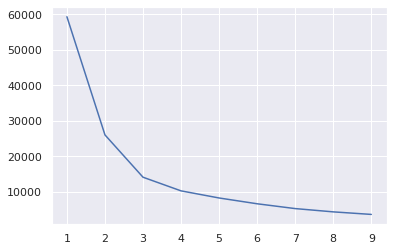

In [182]:
plt.plot(range(1,10),inertias)

###Silhouette score

In [183]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Text(0, 0.5, 'Silhouette score')

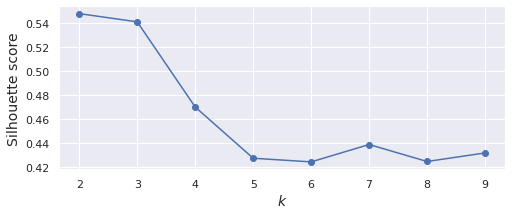

In [184]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

### Build Model

In [185]:
k_means = KMeans(n_clusters=3,random_state=42).fit(X)

In [186]:
labels= k_means.labels_

In [187]:
centroids = k_means.cluster_centers_
centroids

array([[20.53880597,  9.61940299],
       [ 6.54487805,  3.03853659],
       [42.92380952, 24.55238095]])

In [188]:
set(labels)

{0, 1, 2}

In [189]:
X['Labels'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [190]:
type(X['ROE'].loc[1])

numpy.float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


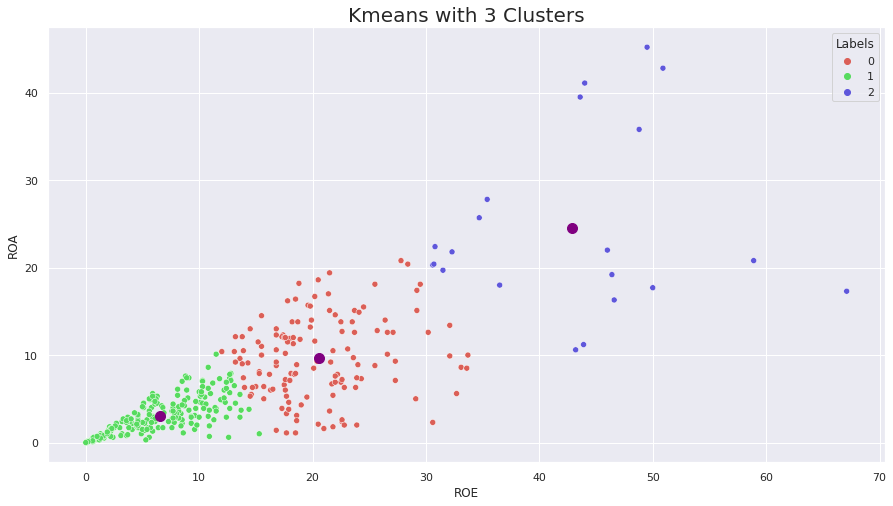

In [191]:
fig,ax= plt.subplots(figsize=(15,8),sharey=True)
sns.set_theme()
sns.scatterplot(X['ROE'], X['ROA'], hue=X['Labels'],
                palette=sns.color_palette('hls', 3),marker='o') 

ax.scatter(centroids[:,0],centroids[:,1],color='purple',s=100,marker='o')
plt.title('Kmeans with 3 Clusters',fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


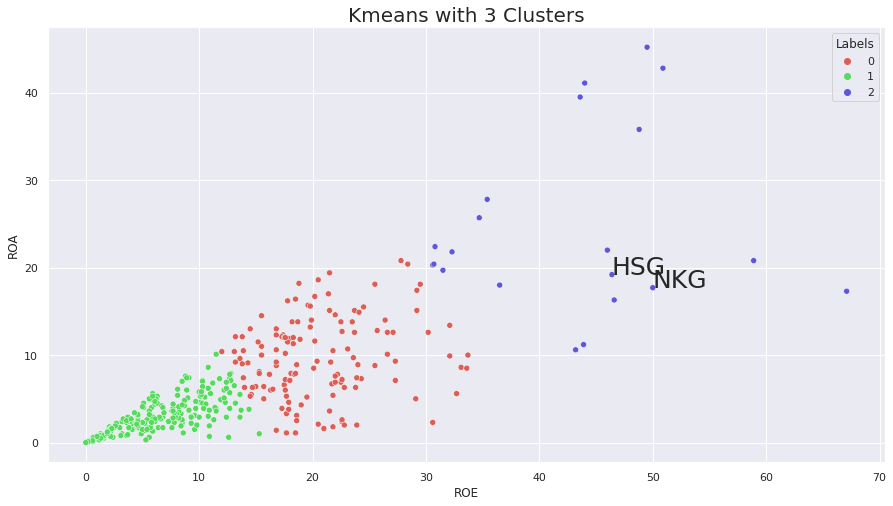

In [192]:
def Stocks_position(lst_name):
  fig, ax = plt.subplots(figsize=(15,8))
  sns.scatterplot(X['ROE'], X['ROA'], hue=X['Labels'],
                  palette=sns.color_palette('hls', 3),marker='o') 

  for name in lst_name:
    index = df[df['Stocks_name'] == name].index
    for i in index :
      plt.text(X['ROE'].loc[i],X['ROA'].loc[i],df['Stocks_name'].loc[i],fontsize=25)
  plt.title('Kmeans with 3 Clusters',fontsize=20)
Stocks_position(['HSG','NKG'])

## AgglomerativeClustering

## DBSCAN

###Choose Eps

In [167]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [168]:
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(X)

NearestNeighbors(n_neighbors=2)

In [169]:
distances, indices = neigh.kneighbors(X)

In [170]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

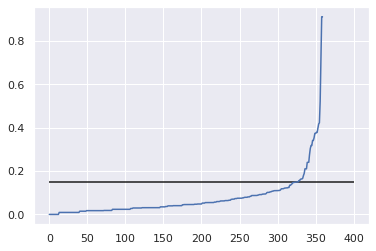

In [171]:
plt.hlines(0.15,xmin=0,xmax=400)
plt.plot(distances)

In [172]:
epsilon = 0.15
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [173]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [174]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

8

In [175]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

In [176]:
np.arange(5)

array([0, 1, 2, 3, 4])

### Build Model

In [177]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

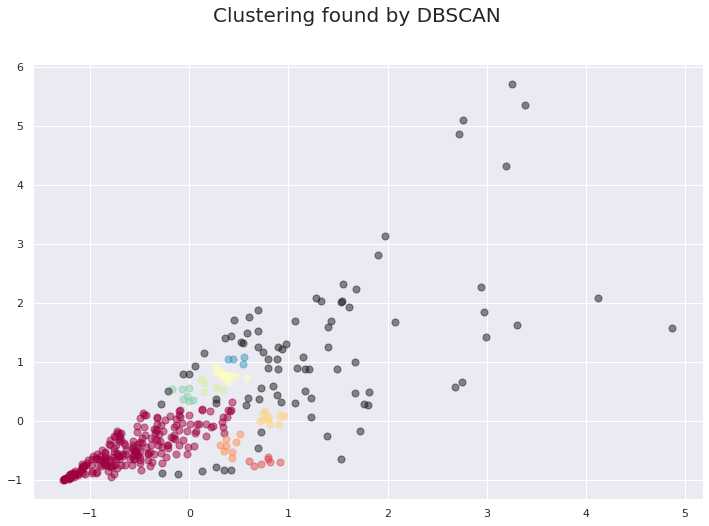

In [178]:
fig , adf = plt.subplots(figsize=(12,8))
plt.suptitle("Clustering found by DBSCAN", fontsize=20)

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

# def plot_outlier(lst_stocks):
#   for outlier_name in lst_stocks :
#     index = df[df['Stocks_name'] == outlier_name].index
#     for i in index :
#       plt.text(X[i][0],X[i][1],df['Stocks_name'].loc[i],fontsize=10)
# plot_outlier(['FPT','MWG'])

##HDBSCAN

In [146]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(X)

HDBSCAN(gen_min_span_tree=True)

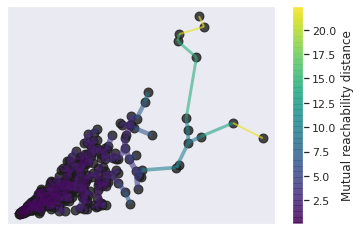

In [147]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2);

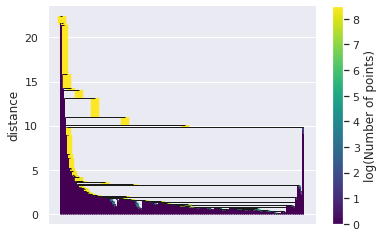

In [148]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

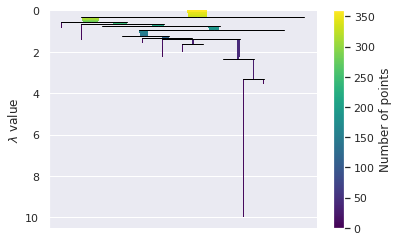

In [149]:
clusterer.condensed_tree_.plot()

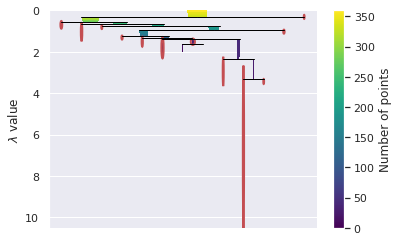

In [150]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

In [151]:
set(clusterer.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [155]:
test_data =StandardScaler().fit_transform(X)

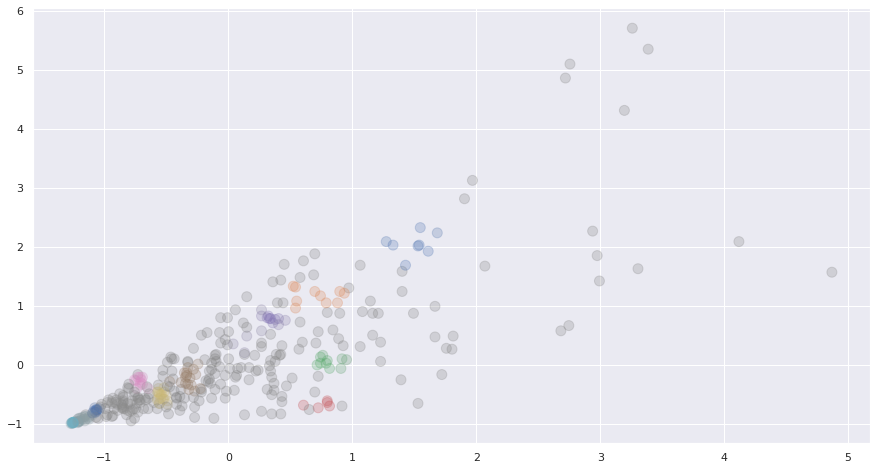

In [157]:
plt.figure(figsize=(15,8))
clusterer = hdbscan.HDBSCAN(min_cluster_size=5).fit(test_data)
color_palette = sns.color_palette('deep',11)
cluster_colors = [color_palette[x] if x >=0 else (0.5, 0.5, 0.5) for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*test_data.T, s=100, c=cluster_member_colors, alpha=0.25);
